In [1]:
# Importing used modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

In [2]:
# Importing data and cleaning it up
df = pd.read_csv('../ML-Cancer-SCC-2020-21/Children\'s Oncology Group Study 9906 for High-Risk Pediatric Training Stats (1).csv')

df = df.drop('TRAINING OR TEST SET?', axis = 1)

df = df.drop("Sample", axis =1)

dummies = pd.get_dummies(df['CONGENITAL ABNORMALITY'], drop_first = True, prefix= "CONGENITAL ABNORMALITY")
df = pd.concat([df.drop('CONGENITAL ABNORMALITY', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['CNS STATUS'], drop_first = True, prefix= "CNS STATUS")
df = pd.concat([df.drop('CNS STATUS', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['TESTICULAR INVOLVEMENT'], drop_first = True, prefix= "TESTICULAR INVOLVEMENT")
df = pd.concat([df.drop('TESTICULAR INVOLVEMENT', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['GENDER'], drop_first = True, prefix= "GENDER")
df = pd.concat([df.drop('GENDER', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['E2A-PBX, T(1;19)'], drop_first = True, prefix= "E2A-PBX, T(1;19)")
df = pd.concat([df.drop('E2A-PBX, T(1;19)', axis=1), dummies], axis=1)

df = df.drop("BCR-ABL, T(9;22)", axis =1)

dummies = pd.get_dummies(df['TEL-AML,T(12;21)'], drop_first = True, prefix= "TEL-AML,T(12;21)")
df = pd.concat([df.drop('TEL-AML,T(12;21)', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['TISSUE TYPE'], drop_first = True, prefix= "TISSUE TYPE")
df = pd.concat([df.drop('TISSUE TYPE', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['RACE'], drop_first = True, prefix= "RACE")
df = pd.concat([df.drop('RACE', axis=1), dummies], axis=1)

dummies = pd.get_dummies(df['TRISOMY 4 AND 10'], drop_first = True, prefix= "TRISOMY 4 AND 10")
df = pd.concat([df.drop('TRISOMY 4 AND 10', axis=1), dummies], axis=1)

df = df.drop("AMPLIFICATION SET", axis = 1)

df = df.drop("HYBRIDIZATION SET", axis = 1)

# dummies = pd.get_dummies(df['MLL'], drop_first = False, prefix= "MLL")
# df = pd.concat([df.drop('MLL', axis=1), dummies], axis=1)

In [3]:
le = LabelEncoder()
df["MLL_encoded"] = le.fit_transform(df.MLL)
df = df.drop("MLL", axis = 1)

In [4]:
df.head()

,"BLAST COUNT, % OF SAMPLE, -1=UNAVAILABLE","SAMPLE VIABILITY, % OF SAMPLE, -1=UNAVAILABLE",AGE IN DAYS AT DIAGNOSIS,"WBC, 1000/MICROLITER",CONGENITAL ABNORMALITY_None,CONGENITAL ABNORMALITY_Other,CONGENITAL ABNORMALITY_Unknown,"CNS STATUS_> 5 CSF WBC/ul with blasts on cytospin and/or eye involvement, cranial nerve involvement, parenchymal brain involvement",CNS STATUS_No CNS disease,TESTICULAR INVOLVEMENT_Positive,...,RACE_Asian,RACE_Black or African American,RACE_Hispanic or Latino,RACE_Native Hawaiian or other Pacific Islander,RACE_Other,RACE_White,RACE_unknown,TRISOMY 4 AND 10_Positive,TRISOMY 4 AND 10_Unknown,MLL_encoded
0,90,66,5349,147.6,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,95,85,4918,5.5,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,95,88,5857,13.3,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,-1,46,713,110.3,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,90,98,5183,23.0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
df['MLL_encoded'].value_counts()

0    186
1     21
Name: MLL_encoded, dtype: int64

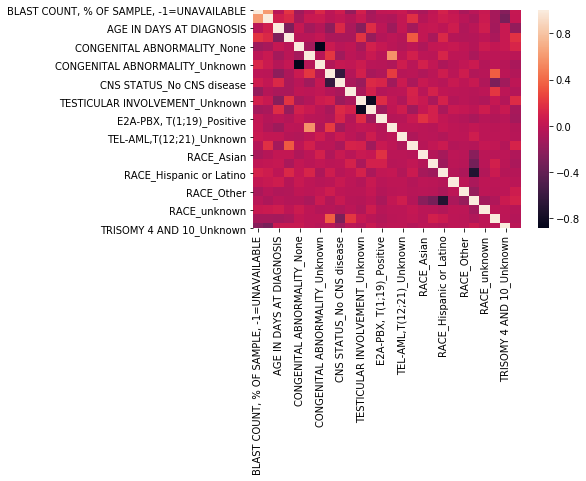

In [6]:
sns.heatmap(df.corr())

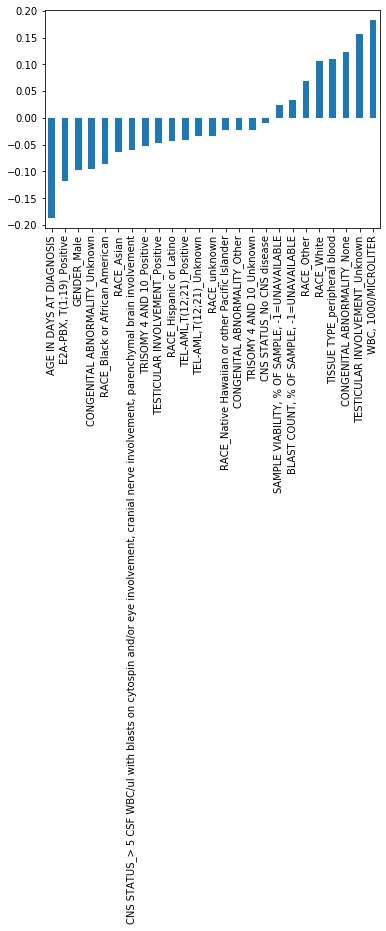

In [7]:
df.corr()['MLL_encoded'][:-1].sort_values().plot(kind='bar')

In [8]:
X = df.drop('MLL_encoded', axis = 1).values
y = df['MLL_encoded'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = Sequential()

In [12]:
print(X_train.shape)
print(X_test.shape)

(155, 25)
(52, 25)


In [13]:
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

In [15]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=128, epochs = 1000)

Train on 155 samples, validate on 52 samples
Epoch 1/1000
155/155 [==============================] - 1s 6ms/sample - loss: 0.5188 - accuracy: 0.8774 - val_loss: 0.5008 - val_accuracy: 0.9038
Epoch 2/1000
155/155 [==============================] - 0s 195us/sample - loss: 0.4974 - accuracy: 0.8774 - val_loss: 0.4648 - val_accuracy: 0.9038
Epoch 3/1000
155/155 [==============================] - 0s 199us/sample - loss: 0.4599 - accuracy: 0.8968 - val_loss: 0.4246 - val_accuracy: 0.9038
Epoch 4/1000
155/155 [==============================] - 0s 185us/sample - loss: 0.4211 - accuracy: 0.8968 - val_loss: 0.3889 - val_accuracy: 0.9038
Epoch 5/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.3863 - accuracy: 0.8968 - val_loss: 0.3627 - val_accuracy: 0.9038
Epoch 6/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.3625 - accuracy: 0.8968 - val_loss: 0.3460 - val_accuracy: 0.9038
Epoch 7/1000
155/155 [==============================] - 0s 136us/samp

Epoch 56/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2975 - accuracy: 0.8968 - val_loss: 0.2889 - val_accuracy: 0.9038
Epoch 57/1000
155/155 [==============================] - 0s 163us/sample - loss: 0.2971 - accuracy: 0.8968 - val_loss: 0.2882 - val_accuracy: 0.9038
Epoch 58/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.2968 - accuracy: 0.8968 - val_loss: 0.2876 - val_accuracy: 0.9038
Epoch 59/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2966 - accuracy: 0.8968 - val_loss: 0.2871 - val_accuracy: 0.9038
Epoch 60/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2959 - accuracy: 0.8968 - val_loss: 0.2867 - val_accuracy: 0.9038
Epoch 61/1000
155/155 [==============================] - 0s 181us/sample - loss: 0.2953 - accuracy: 0.8968 - val_loss: 0.2864 - val_accuracy: 0.9038
Epoch 62/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2948 - accuracy: 0.8968

Epoch 111/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2797 - accuracy: 0.8968 - val_loss: 0.2724 - val_accuracy: 0.9038
Epoch 112/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2793 - accuracy: 0.8968 - val_loss: 0.2724 - val_accuracy: 0.9038
Epoch 113/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2792 - accuracy: 0.8968 - val_loss: 0.2724 - val_accuracy: 0.9038
Epoch 114/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2790 - accuracy: 0.8968 - val_loss: 0.2723 - val_accuracy: 0.9038
Epoch 115/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2788 - accuracy: 0.8968 - val_loss: 0.2724 - val_accuracy: 0.9038
Epoch 116/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2789 - accuracy: 0.8968 - val_loss: 0.2723 - val_accuracy: 0.9038
Epoch 117/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2787 - accuracy:

155/155 [==============================] - 0s 135us/sample - loss: 0.2685 - accuracy: 0.8968 - val_loss: 0.2633 - val_accuracy: 0.9038
Epoch 166/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2682 - accuracy: 0.8968 - val_loss: 0.2630 - val_accuracy: 0.9038
Epoch 167/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2681 - accuracy: 0.8968 - val_loss: 0.2627 - val_accuracy: 0.9038
Epoch 168/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2679 - accuracy: 0.8968 - val_loss: 0.2625 - val_accuracy: 0.9038
Epoch 169/1000
155/155 [==============================] - 0s 154us/sample - loss: 0.2677 - accuracy: 0.8968 - val_loss: 0.2623 - val_accuracy: 0.9038
Epoch 170/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2677 - accuracy: 0.8968 - val_loss: 0.2621 - val_accuracy: 0.9038
Epoch 171/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2675 - accuracy: 0.8968 - val_l

Epoch 220/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2586 - accuracy: 0.8968 - val_loss: 0.2573 - val_accuracy: 0.9038
Epoch 221/1000
155/155 [==============================] - 0s 141us/sample - loss: 0.2582 - accuracy: 0.8968 - val_loss: 0.2562 - val_accuracy: 0.9038
Epoch 222/1000
155/155 [==============================] - 0s 154us/sample - loss: 0.2585 - accuracy: 0.8968 - val_loss: 0.2552 - val_accuracy: 0.9038
Epoch 223/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2580 - accuracy: 0.8968 - val_loss: 0.2547 - val_accuracy: 0.9038
Epoch 224/1000
155/155 [==============================] - 0s 146us/sample - loss: 0.2580 - accuracy: 0.8968 - val_loss: 0.2542 - val_accuracy: 0.9038
Epoch 225/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2578 - accuracy: 0.8968 - val_loss: 0.2539 - val_accuracy: 0.9038
Epoch 226/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2577 - accuracy:

155/155 [==============================] - 0s 148us/sample - loss: 0.2496 - accuracy: 0.8968 - val_loss: 0.2492 - val_accuracy: 0.9038
Epoch 275/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2494 - accuracy: 0.8968 - val_loss: 0.2492 - val_accuracy: 0.9038
Epoch 276/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2493 - accuracy: 0.8968 - val_loss: 0.2491 - val_accuracy: 0.9038
Epoch 277/1000
155/155 [==============================] - 0s 138us/sample - loss: 0.2492 - accuracy: 0.8968 - val_loss: 0.2488 - val_accuracy: 0.9038
Epoch 278/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.2490 - accuracy: 0.8968 - val_loss: 0.2485 - val_accuracy: 0.9038
Epoch 279/1000
155/155 [==============================] - 0s 149us/sample - loss: 0.2488 - accuracy: 0.8968 - val_loss: 0.2483 - val_accuracy: 0.9038
Epoch 280/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.2486 - accuracy: 0.8968 - val_l

Epoch 329/1000
155/155 [==============================] - 0s 194us/sample - loss: 0.2408 - accuracy: 0.9097 - val_loss: 0.2426 - val_accuracy: 0.9038
Epoch 330/1000
155/155 [==============================] - 0s 190us/sample - loss: 0.2406 - accuracy: 0.9097 - val_loss: 0.2430 - val_accuracy: 0.9038
Epoch 331/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.2401 - accuracy: 0.9097 - val_loss: 0.2437 - val_accuracy: 0.9038
Epoch 332/1000
155/155 [==============================] - 0s 171us/sample - loss: 0.2399 - accuracy: 0.9097 - val_loss: 0.2442 - val_accuracy: 0.9038
Epoch 333/1000
155/155 [==============================] - 0s 193us/sample - loss: 0.2396 - accuracy: 0.9097 - val_loss: 0.2445 - val_accuracy: 0.9038
Epoch 334/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.2394 - accuracy: 0.9097 - val_loss: 0.2451 - val_accuracy: 0.9038
Epoch 335/1000
155/155 [==============================] - 0s 168us/sample - loss: 0.2393 - accuracy:

155/155 [==============================] - 0s 155us/sample - loss: 0.2320 - accuracy: 0.9097 - val_loss: 0.2422 - val_accuracy: 0.9038
Epoch 384/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2317 - accuracy: 0.9097 - val_loss: 0.2413 - val_accuracy: 0.9038
Epoch 385/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2318 - accuracy: 0.9097 - val_loss: 0.2404 - val_accuracy: 0.9038
Epoch 386/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2314 - accuracy: 0.9097 - val_loss: 0.2400 - val_accuracy: 0.9038
Epoch 387/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.2313 - accuracy: 0.9097 - val_loss: 0.2396 - val_accuracy: 0.9038
Epoch 388/1000
155/155 [==============================] - 0s 194us/sample - loss: 0.2311 - accuracy: 0.9097 - val_loss: 0.2390 - val_accuracy: 0.9038
Epoch 389/1000
155/155 [==============================] - 0s 172us/sample - loss: 0.2314 - accuracy: 0.9097 - val_l

Epoch 438/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.2234 - accuracy: 0.9097 - val_loss: 0.2381 - val_accuracy: 0.9038
Epoch 439/1000
155/155 [==============================] - 0s 187us/sample - loss: 0.2232 - accuracy: 0.9097 - val_loss: 0.2385 - val_accuracy: 0.9038
Epoch 440/1000
155/155 [==============================] - 0s 193us/sample - loss: 0.2232 - accuracy: 0.9097 - val_loss: 0.2387 - val_accuracy: 0.9038
Epoch 441/1000
155/155 [==============================] - 0s 173us/sample - loss: 0.2229 - accuracy: 0.9097 - val_loss: 0.2383 - val_accuracy: 0.9038
Epoch 442/1000
155/155 [==============================] - 0s 173us/sample - loss: 0.2228 - accuracy: 0.9097 - val_loss: 0.2378 - val_accuracy: 0.9038
Epoch 443/1000
155/155 [==============================] - 0s 191us/sample - loss: 0.2228 - accuracy: 0.9097 - val_loss: 0.2373 - val_accuracy: 0.9038
Epoch 444/1000
155/155 [==============================] - 0s 187us/sample - loss: 0.2228 - accuracy:

155/155 [==============================] - 0s 153us/sample - loss: 0.2164 - accuracy: 0.9097 - val_loss: 0.2393 - val_accuracy: 0.9038
Epoch 493/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2161 - accuracy: 0.9097 - val_loss: 0.2406 - val_accuracy: 0.9038
Epoch 494/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2164 - accuracy: 0.9097 - val_loss: 0.2416 - val_accuracy: 0.9038
Epoch 495/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2161 - accuracy: 0.9097 - val_loss: 0.2423 - val_accuracy: 0.9038
Epoch 496/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.2162 - accuracy: 0.9097 - val_loss: 0.2433 - val_accuracy: 0.9038
Epoch 497/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2164 - accuracy: 0.9097 - val_loss: 0.2436 - val_accuracy: 0.9038
Epoch 498/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2162 - accuracy: 0.9097 - val_l

Epoch 547/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.2095 - accuracy: 0.9161 - val_loss: 0.2375 - val_accuracy: 0.9038
Epoch 548/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2093 - accuracy: 0.9161 - val_loss: 0.2376 - val_accuracy: 0.9038
Epoch 549/1000
155/155 [==============================] - 0s 187us/sample - loss: 0.2091 - accuracy: 0.9161 - val_loss: 0.2379 - val_accuracy: 0.9038
Epoch 550/1000
155/155 [==============================] - 0s 173us/sample - loss: 0.2088 - accuracy: 0.9161 - val_loss: 0.2387 - val_accuracy: 0.9038
Epoch 551/1000
155/155 [==============================] - 0s 168us/sample - loss: 0.2089 - accuracy: 0.9097 - val_loss: 0.2394 - val_accuracy: 0.9038
Epoch 552/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.2086 - accuracy: 0.9097 - val_loss: 0.2393 - val_accuracy: 0.9038
Epoch 553/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.2083 - accuracy:

155/155 [==============================] - 0s 148us/sample - loss: 0.2026 - accuracy: 0.9161 - val_loss: 0.2411 - val_accuracy: 0.9038
Epoch 602/1000
155/155 [==============================] - 0s 168us/sample - loss: 0.2024 - accuracy: 0.9161 - val_loss: 0.2416 - val_accuracy: 0.9038
Epoch 603/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2024 - accuracy: 0.9161 - val_loss: 0.2417 - val_accuracy: 0.9038
Epoch 604/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2024 - accuracy: 0.9161 - val_loss: 0.2417 - val_accuracy: 0.9038
Epoch 605/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2022 - accuracy: 0.9161 - val_loss: 0.2414 - val_accuracy: 0.9038
Epoch 606/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2022 - accuracy: 0.9161 - val_loss: 0.2410 - val_accuracy: 0.9038
Epoch 607/1000
155/155 [==============================] - 0s 123us/sample - loss: 0.2017 - accuracy: 0.9161 - val_l

Epoch 656/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.1965 - accuracy: 0.9161 - val_loss: 0.2394 - val_accuracy: 0.9038
Epoch 657/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1959 - accuracy: 0.9161 - val_loss: 0.2373 - val_accuracy: 0.9038
Epoch 658/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.1955 - accuracy: 0.9161 - val_loss: 0.2355 - val_accuracy: 0.9038
Epoch 659/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1955 - accuracy: 0.9226 - val_loss: 0.2337 - val_accuracy: 0.9038
Epoch 660/1000
155/155 [==============================] - 0s 123us/sample - loss: 0.1957 - accuracy: 0.9226 - val_loss: 0.2322 - val_accuracy: 0.9038
Epoch 661/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1963 - accuracy: 0.9226 - val_loss: 0.2314 - val_accuracy: 0.9038
Epoch 662/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1965 - accuracy:

155/155 [==============================] - 0s 142us/sample - loss: 0.1901 - accuracy: 0.9226 - val_loss: 0.2378 - val_accuracy: 0.9038
Epoch 711/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.1900 - accuracy: 0.9226 - val_loss: 0.2383 - val_accuracy: 0.9038
Epoch 712/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.1901 - accuracy: 0.9226 - val_loss: 0.2386 - val_accuracy: 0.9038
Epoch 713/1000
155/155 [==============================] - 0s 110us/sample - loss: 0.1901 - accuracy: 0.9226 - val_loss: 0.2381 - val_accuracy: 0.9038
Epoch 714/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1898 - accuracy: 0.9226 - val_loss: 0.2367 - val_accuracy: 0.9038
Epoch 715/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1901 - accuracy: 0.9226 - val_loss: 0.2352 - val_accuracy: 0.9038
Epoch 716/1000
155/155 [==============================] - 0s 226us/sample - loss: 0.1900 - accuracy: 0.9226 - val_l

Epoch 765/1000
155/155 [==============================] - 0s 130us/sample - loss: 0.1854 - accuracy: 0.9290 - val_loss: 0.2336 - val_accuracy: 0.9038
Epoch 766/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1853 - accuracy: 0.9355 - val_loss: 0.2342 - val_accuracy: 0.9038
Epoch 767/1000
155/155 [==============================] - 0s 150us/sample - loss: 0.1851 - accuracy: 0.9355 - val_loss: 0.2352 - val_accuracy: 0.9038
Epoch 768/1000
155/155 [==============================] - 0s 155us/sample - loss: 0.1848 - accuracy: 0.9290 - val_loss: 0.2354 - val_accuracy: 0.9038
Epoch 769/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1846 - accuracy: 0.9290 - val_loss: 0.2351 - val_accuracy: 0.9038
Epoch 770/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.1847 - accuracy: 0.9290 - val_loss: 0.2348 - val_accuracy: 0.9038
Epoch 771/1000
155/155 [==============================] - 0s 181us/sample - loss: 0.1850 - accuracy:

155/155 [==============================] - 0s 155us/sample - loss: 0.1795 - accuracy: 0.9355 - val_loss: 0.2431 - val_accuracy: 0.9038
Epoch 820/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1795 - accuracy: 0.9355 - val_loss: 0.2429 - val_accuracy: 0.9038
Epoch 821/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.1792 - accuracy: 0.9355 - val_loss: 0.2412 - val_accuracy: 0.9038
Epoch 822/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.1795 - accuracy: 0.9355 - val_loss: 0.2395 - val_accuracy: 0.9038
Epoch 823/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1790 - accuracy: 0.9419 - val_loss: 0.2394 - val_accuracy: 0.9038
Epoch 824/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1791 - accuracy: 0.9419 - val_loss: 0.2390 - val_accuracy: 0.9038
Epoch 825/1000
155/155 [==============================] - 0s 181us/sample - loss: 0.1789 - accuracy: 0.9419 - val_l

Epoch 874/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1754 - accuracy: 0.9484 - val_loss: 0.2358 - val_accuracy: 0.9231
Epoch 875/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.1753 - accuracy: 0.9484 - val_loss: 0.2354 - val_accuracy: 0.9231
Epoch 876/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.1754 - accuracy: 0.9484 - val_loss: 0.2352 - val_accuracy: 0.9231
Epoch 877/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.1753 - accuracy: 0.9484 - val_loss: 0.2354 - val_accuracy: 0.9231
Epoch 878/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.1748 - accuracy: 0.9484 - val_loss: 0.2370 - val_accuracy: 0.9038
Epoch 879/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.1743 - accuracy: 0.9484 - val_loss: 0.2391 - val_accuracy: 0.9038
Epoch 880/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1739 - accuracy:

155/155 [==============================] - 0s 181us/sample - loss: 0.1699 - accuracy: 0.9419 - val_loss: 0.2417 - val_accuracy: 0.9038
Epoch 929/1000
155/155 [==============================] - 0s 168us/sample - loss: 0.1697 - accuracy: 0.9419 - val_loss: 0.2427 - val_accuracy: 0.9038
Epoch 930/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.1697 - accuracy: 0.9419 - val_loss: 0.2434 - val_accuracy: 0.9038
Epoch 931/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.1697 - accuracy: 0.9419 - val_loss: 0.2438 - val_accuracy: 0.9038
Epoch 932/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.1696 - accuracy: 0.9419 - val_loss: 0.2445 - val_accuracy: 0.9038
Epoch 933/1000
155/155 [==============================] - 0s 110us/sample - loss: 0.1695 - accuracy: 0.9419 - val_loss: 0.2448 - val_accuracy: 0.9038
Epoch 934/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.1694 - accuracy: 0.9419 - val_l

Epoch 983/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.1657 - accuracy: 0.9484 - val_loss: 0.2334 - val_accuracy: 0.9038
Epoch 984/1000
155/155 [==============================] - 0s 171us/sample - loss: 0.1670 - accuracy: 0.9484 - val_loss: 0.2309 - val_accuracy: 0.9038
Epoch 985/1000
155/155 [==============================] - 0s 168us/sample - loss: 0.1686 - accuracy: 0.9484 - val_loss: 0.2300 - val_accuracy: 0.9038
Epoch 986/1000
155/155 [==============================] - 0s 173us/sample - loss: 0.1687 - accuracy: 0.9484 - val_loss: 0.2304 - val_accuracy: 0.9038
Epoch 987/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.1682 - accuracy: 0.9484 - val_loss: 0.2312 - val_accuracy: 0.9038
Epoch 988/1000
155/155 [==============================] - 0s 168us/sample - loss: 0.1670 - accuracy: 0.9484 - val_loss: 0.2316 - val_accuracy: 0.9038
Epoch 989/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.1663 - accuracy:

In [16]:
loss = pd.DataFrame(model.history.history)

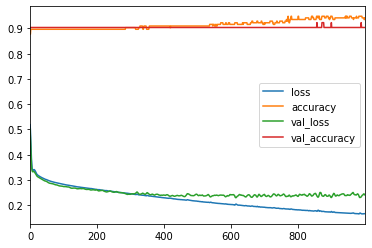

In [17]:
loss.plot();

In [18]:
predict = model.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       0.00      0.00      0.00         5

    accuracy                           0.90        52
   macro avg       0.45      0.50      0.47        52
weighted avg       0.82      0.90      0.86        52



c:\users\max\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
X = df.drop('MLL_encoded', axis = 1).values
y = df['MLL_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model2 = Sequential()
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

model2.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=128, epochs = 1000, callbacks=[early_stop])

Train on 155 samples, validate on 52 samples
Epoch 1/1000
155/155 [==============================] - 1s 4ms/sample - loss: 0.8373 - accuracy: 0.1613 - val_loss: 0.8106 - val_accuracy: 0.1923
Epoch 2/1000
155/155 [==============================] - 0s 183us/sample - loss: 0.7824 - accuracy: 0.2452 - val_loss: 0.7110 - val_accuracy: 0.5769
Epoch 3/1000
155/155 [==============================] - 0s 168us/sample - loss: 0.6862 - accuracy: 0.5484 - val_loss: 0.6039 - val_accuracy: 0.7885
Epoch 4/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.5823 - accuracy: 0.8387 - val_loss: 0.5071 - val_accuracy: 0.9038
Epoch 5/1000
155/155 [==============================] - 0s 174us/sample - loss: 0.4928 - accuracy: 0.8839 - val_loss: 0.4318 - val_accuracy: 0.9038
Epoch 6/1000
155/155 [==============================] - 0s 181us/sample - loss: 0.4269 - accuracy: 0.8968 - val_loss: 0.3824 - val_accuracy: 0.9038
Epoch 7/1000
155/155 [==============================] - 0s 148us/samp

Epoch 56/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.3075 - accuracy: 0.8968 - val_loss: 0.3152 - val_accuracy: 0.9038
Epoch 57/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.3069 - accuracy: 0.8968 - val_loss: 0.3148 - val_accuracy: 0.9038
Epoch 58/1000
155/155 [==============================] - 0s 136us/sample - loss: 0.3064 - accuracy: 0.8968 - val_loss: 0.3144 - val_accuracy: 0.9038
Epoch 59/1000
155/155 [==============================] - 0s 129us/sample - loss: 0.3056 - accuracy: 0.8968 - val_loss: 0.3141 - val_accuracy: 0.9038
Epoch 60/1000
155/155 [==============================] - 0s 122us/sample - loss: 0.3051 - accuracy: 0.8968 - val_loss: 0.3138 - val_accuracy: 0.9038
Epoch 61/1000
155/155 [==============================] - 0s 123us/sample - loss: 0.3045 - accuracy: 0.8968 - val_loss: 0.3135 - val_accuracy: 0.9038
Epoch 62/1000
155/155 [==============================] - 0s 123us/sample - loss: 0.3038 - accuracy: 0.8968

Epoch 111/1000
155/155 [==============================] - 0s 135us/sample - loss: 0.2808 - accuracy: 0.8968 - val_loss: 0.3020 - val_accuracy: 0.9038
Epoch 112/1000
155/155 [==============================] - 0s 142us/sample - loss: 0.2804 - accuracy: 0.8968 - val_loss: 0.3018 - val_accuracy: 0.9038
Epoch 113/1000
155/155 [==============================] - 0s 139us/sample - loss: 0.2799 - accuracy: 0.8968 - val_loss: 0.3016 - val_accuracy: 0.9038
Epoch 114/1000
155/155 [==============================] - 0s 161us/sample - loss: 0.2795 - accuracy: 0.8968 - val_loss: 0.3014 - val_accuracy: 0.9038
Epoch 115/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2791 - accuracy: 0.8968 - val_loss: 0.3011 - val_accuracy: 0.9038
Epoch 116/1000
155/155 [==============================] - 0s 148us/sample - loss: 0.2787 - accuracy: 0.8968 - val_loss: 0.3009 - val_accuracy: 0.9038
Epoch 117/1000
155/155 [==============================] - 0s 152us/sample - loss: 0.2783 - accuracy:

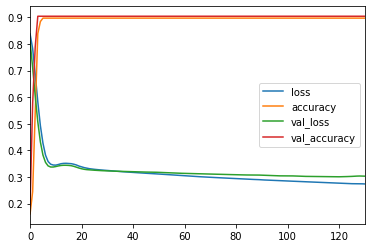

In [20]:
loss = pd.DataFrame(model2.history.history)
loss.plot();

In [21]:
predict = model2.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       0.00      0.00      0.00         5

    accuracy                           0.90        52
   macro avg       0.45      0.50      0.47        52
weighted avg       0.82      0.90      0.86        52



c:\users\max\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# This is how you would test a new case

In [31]:
new_patient = df.drop('MLL_encoded',axis=1).iloc[6]
new_patient = scaler.transform(new_patient.values.reshape(-1,25))
model.predict(new_patient)

array([[0.8375405]], dtype=float32)

In [33]:
new_patient = df.drop('MLL_encoded',axis=1).iloc[0]
new_patient = scaler.transform(new_patient.values.reshape(-1,25))
model.predict(new_patient)

array([[0.00109528]], dtype=float32)

## The closer it is to 1, the more likely they are to have it, the closer to 0, the less likely